In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from process import get_processed_data
df = get_processed_data()

/home/willi/Documents/erosion_data_analytics/transformation.py:6: FutureWarning: the 'outtype' keyword is deprecated, use 'orient' instead
  vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())


In [2]:
df.head()

,Unnamed: 0,Paper,Name,Latitude,Longitude,Mean basin elevation (m),Basin Relief (m),Basin Area (km2),Mean Latutide (dec. Deg.),Mean Longitude (dec. Deg),...,Climate zone main=Arid,Climate zone main=Cold,Climate zone main=Polar,Climate zone main=Temperate,Climate zone main=Tropical,Rock type,Rock type=Igneous,Rock type=Metamorphic,Rock type=Mixed,Rock type=Sedimentary
0,1.0,"Abbuhl et al., 2010",Piu11,-4.918,-79.894,3076.0,141.0,1.14,-4.930,-4.918,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,"Abbuhl et al., 2010",Piu10,-4.945,-79.996,2080.0,2286.0,93.88,-4.907,-4.945,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,"Abbuhl et al., 2010",Piu9,-5.018,-80.054,1671.0,3078.0,153.99,-4.938,-5.018,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,"Abbuhl et al., 2010",Piu8,-5.086,-80.132,1438.0,3250.0,186.69,-4.956,-5.086,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,"Abbuhl et al., 2010",Piu6,-5.104,-80.158,1394.0,3264.0,192.97,-4.961,-5.104,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.dropna().describe()

,Unnamed: 0,Latitude,Longitude,Mean basin elevation (m),Basin Relief (m),Basin Area (km2),Mean Latutide (dec. Deg.),Mean Longitude (dec. Deg),Effective basin elevation (m),Mean Basin slope,...,Climate zone main=Arid,Climate zone main=Cold,Climate zone main=Polar,Climate zone main=Temperate,Climate zone main=Tropical,Rock type,Rock type=Igneous,Rock type=Metamorphic,Rock type=Mixed,Rock type=Sedimentary
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.0,1140.000000,1140.000000,1140.000000,1140.000000
mean,607.338596,25.220998,-24.313931,1666.032456,1275.524561,1.116164e+04,24.908352,-19.587338,1704.876316,15.075355,...,0.197368,0.250877,0.061404,0.422807,0.067544,0.0,0.259649,0.268421,0.260526,0.211404
std,351.671667,24.035580,85.719236,1212.089413,1421.364594,7.909623e+04,23.624836,85.978264,1230.718974,8.887286,...,0.398187,0.433708,0.240174,0.494222,0.251072,0.0,0.438635,0.443332,0.439114,0.408483
min,1.000000,-36.667000,-124.240000,15.000000,-1.000000,0.000000e+00,-36.636000,-124.099000,14.000000,0.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,302.750000,9.357000,-83.892000,668.500000,330.500000,2.820000e+00,9.346750,-83.663500,683.750000,7.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,605.500000,34.403500,-67.742000,1430.000000,802.000000,1.630000e+01,34.385500,-64.998000,1457.000000,14.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,915.250000,40.150500,48.205000,2179.500000,1643.250000,3.027575e+02,40.117000,79.355500,2231.250000,21.700000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000
max,1212.000000,150.162000,150.000000,5057.000000,7265.000000,1.695910e+06,50.034000,150.182000,5069.000000,42.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [4]:
df.columns.values

array(['Unnamed: 0', 'Paper', 'Name', 'Latitude', 'Longitude',
       'Mean basin elevation (m)', 'Basin Relief (m)', 'Basin Area (km2)',
       'Mean Latutide (dec. Deg.)', 'Mean Longitude (dec. Deg)',
       'Effective basin elevation (m)', 'Mean Basin slope',
       'Mean annual precipitation (mm/yr)', 'Mean annual Temperature (C)',
       '% Vegetation', 'Seismicity', 'Seismic regime',
       'Cronus erosion rate (m/My)', 'Cronus erosion rate error (m/My)',
       'Climate zone main', 'Climate zone main=Arid',
       'Climate zone main=Cold', 'Climate zone main=Polar',
       'Climate zone main=Temperate', 'Climate zone main=Tropical',
       'Rock type', 'Rock type=Igneous', 'Rock type=Metamorphic',
       'Rock type=Mixed', 'Rock type=Sedimentary'], dtype=object)

/home/willi/Documents/erosion_data_analytics/venv/lib/python3.4/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


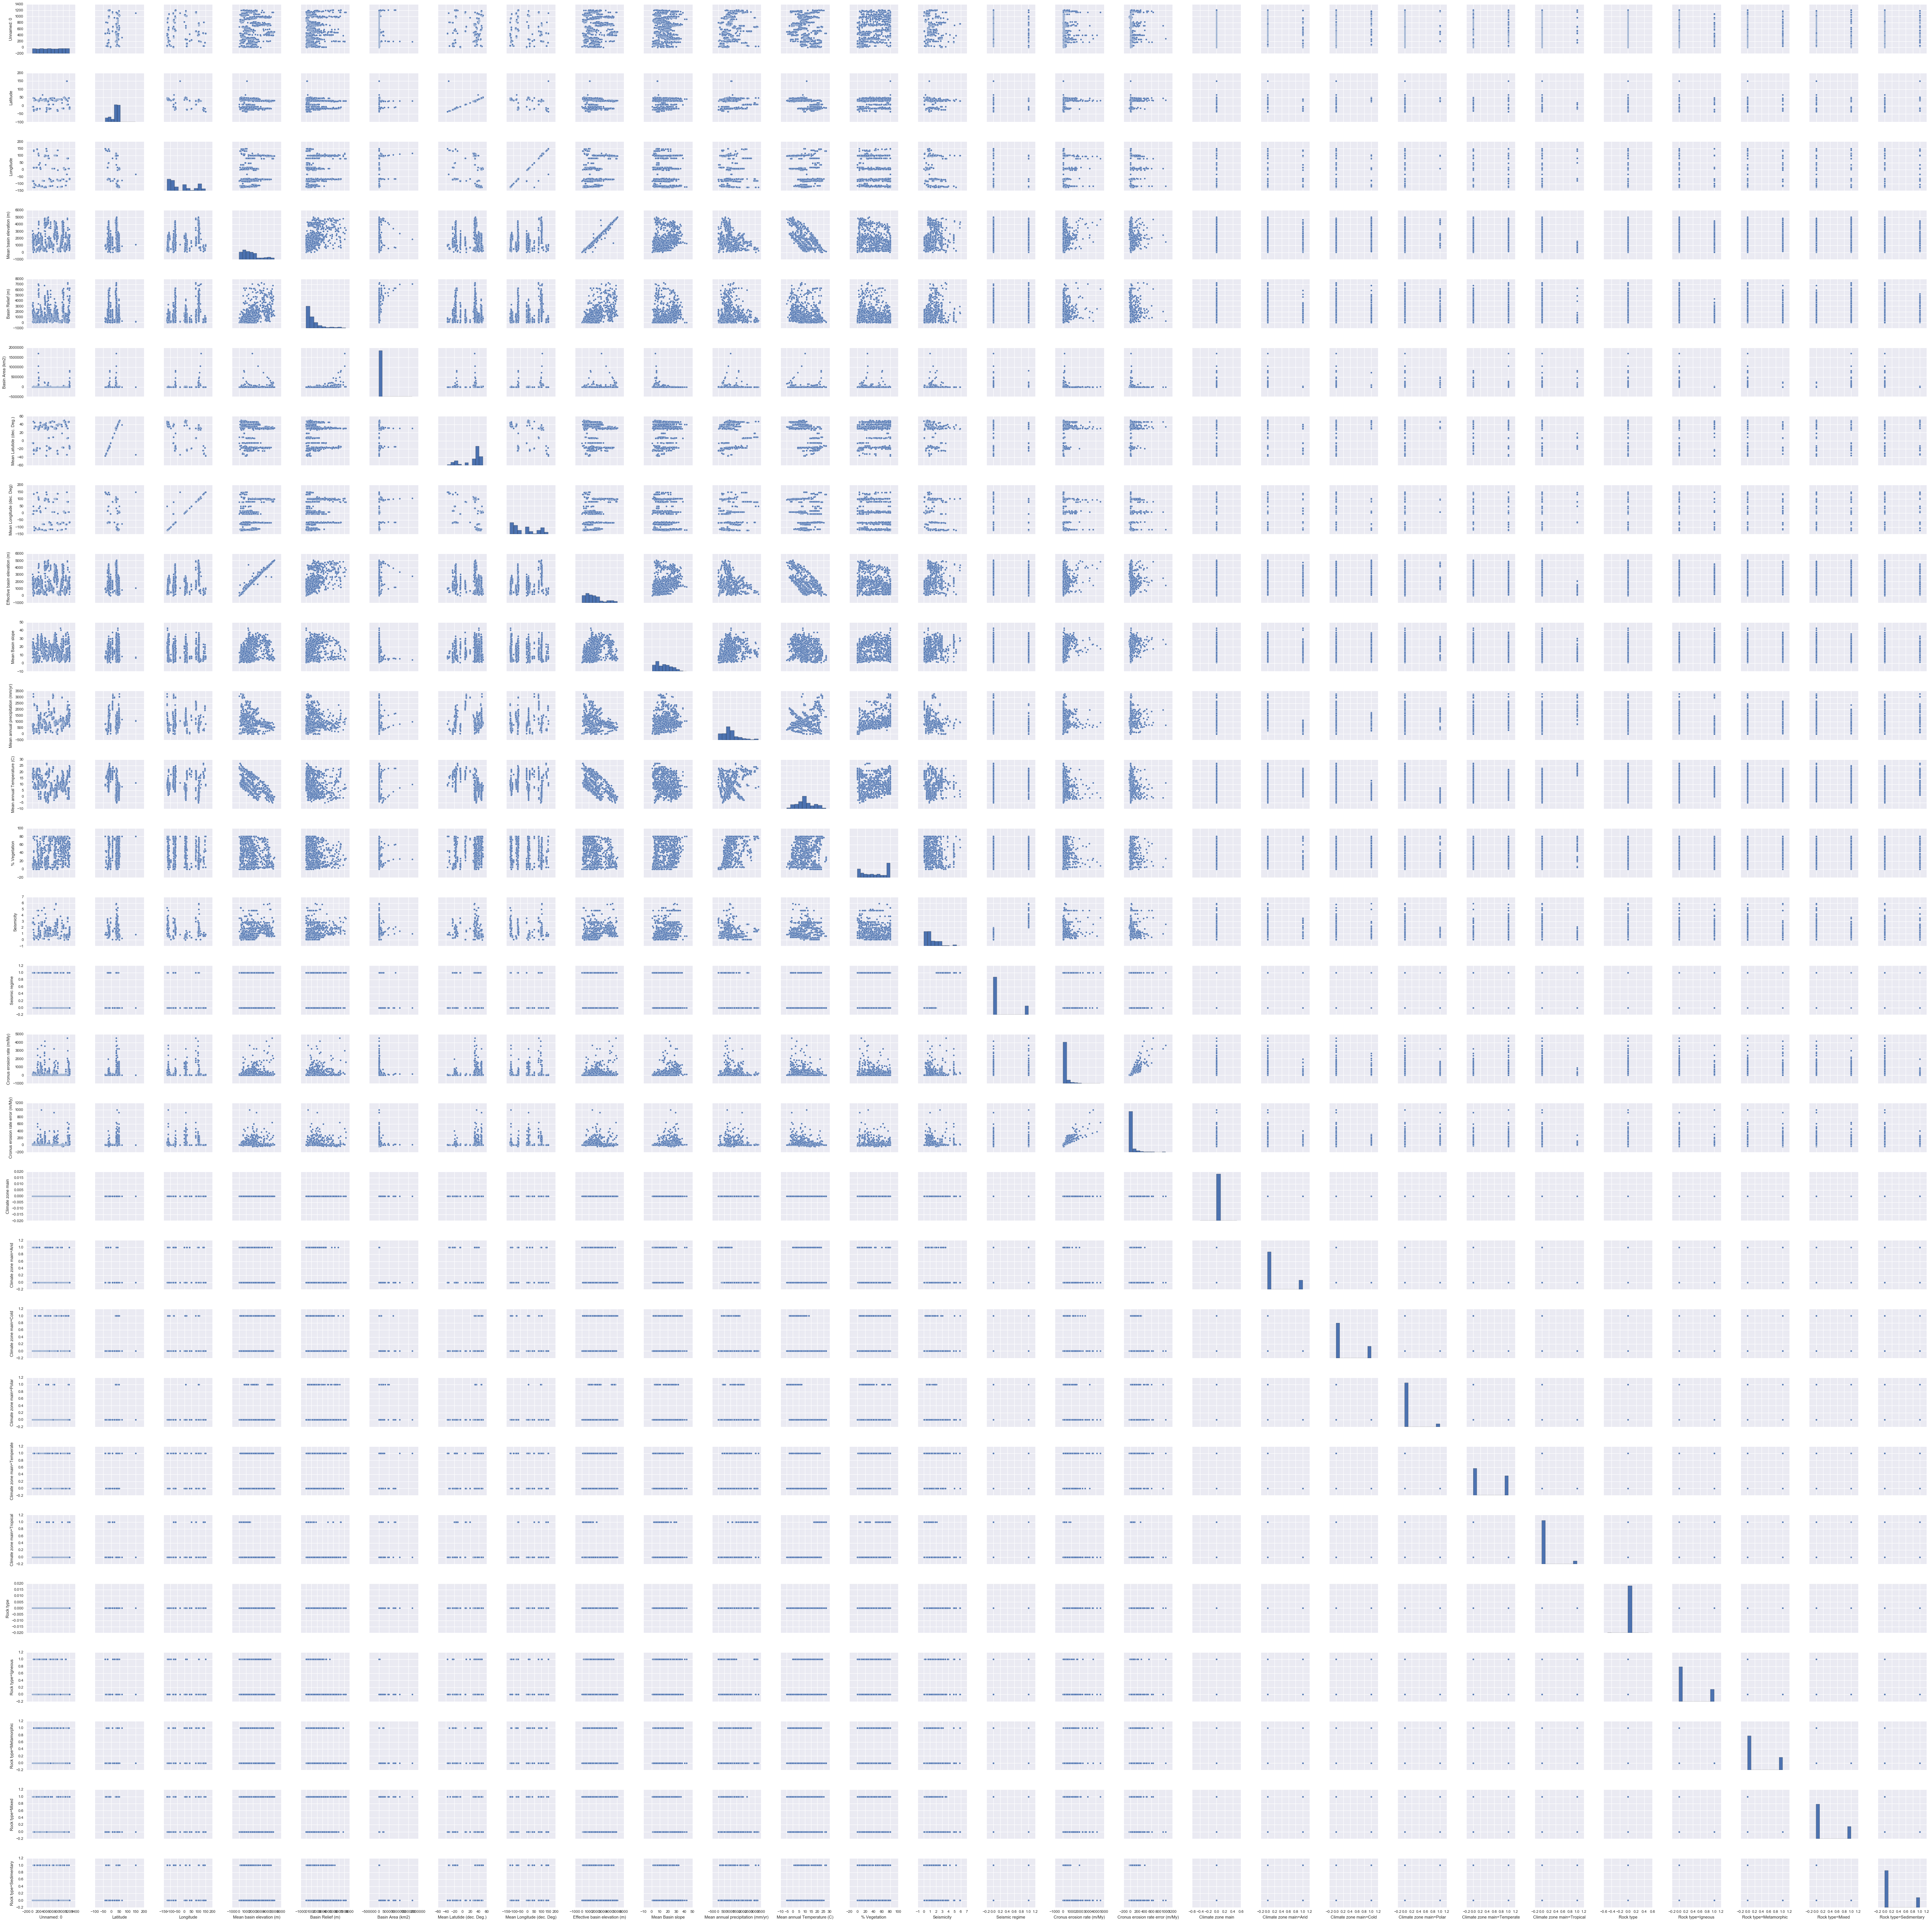

In [5]:
sb.pairplot(df.dropna())

In [13]:
from process import read_data
df_raw = read_data()
df_important = pd.DataFrame()
df_important["Mean Basin slope"] = df["Mean Basin slope"]
df_important["Rock type"] = df_raw["Rock type"]
df_important["Cronus erosion rate (m/My)"] = df["Cronus erosion rate (m/My)"]
df_important["Mean annual precipitation (mm/yr)"] = df["Mean annual precipitation (mm/yr)"]
df_important["% Vegetation"] = df["% Vegetation"]

In [14]:
df_important = df_important.dropna()
df_important

,Mean Basin slope,Rock type,Cronus erosion rate (m/My),Mean annual precipitation (mm/yr),% Vegetation
0,7.2,Mixed,6.95,735.0,5.0
1,20.1,Mixed,128.23,815.0,9.0
2,20.8,Mixed,126.29,716.0,9.0
3,19.2,Mixed,122.11,639.0,9.0
4,18.6,Mixed,89.53,626.0,9.0
5,26.1,Mixed,29.84,800.0,13.0
6,22.3,Mixed,162.25,792.0,12.0
7,21.0,Mixed,246.47,789.0,10.0
8,21.1,Mixed,118.49,763.0,13.0
9,21.4,Mixed,149.27,743.0,13.0


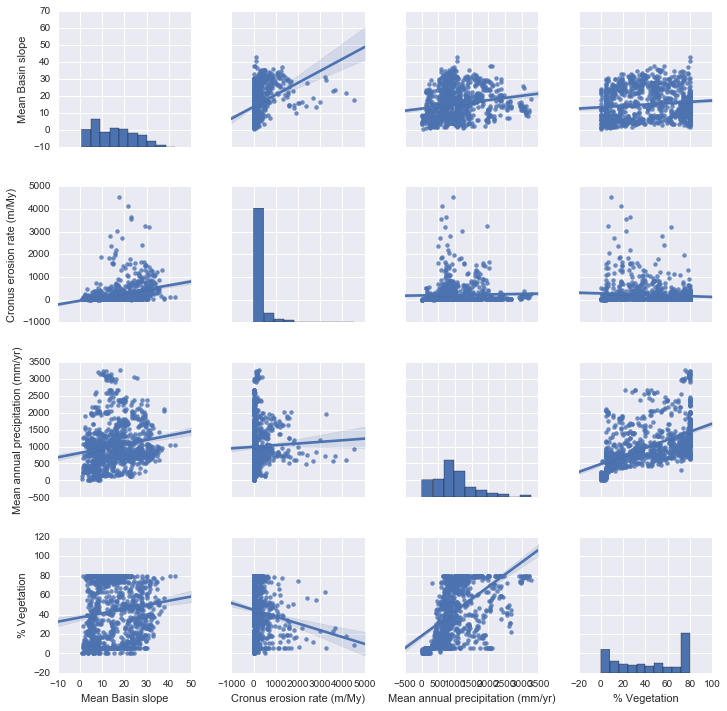

In [15]:
sb.pairplot(df_important, kind='reg')